Import Data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from lmfit import Model

# Load the .mqa file
path = 'C:/Natuurkunde/NSP2/Data/52cm_holle_cilinder.mqa' 
df = pd.read_csv(path, sep='\t', header=0)

Calculate $a$, $t_0$ and fitreport

In [83]:
# Prepare the time and distance (s) arrays for fitting
time = df['Time']
x_position = df['Point #1.X']
y_position = df['Point #1.Y']

# Manually specify the begin and end indices
start_index = 214 
end_index = 464

# Slice the data based on the manually specified range
time_selected = time.iloc[start_index:end_index].reset_index(drop=True)
x_position_selected = x_position.iloc[start_index:end_index].reset_index(drop=True)
y_position_selected = y_position.iloc[start_index:end_index].reset_index(drop=True)

# Adjust the data to start at (0, 0)
x_position_adjusted = x_position_selected - x_position_selected.iloc[0]
y_position_adjusted = y_position_selected - y_position_selected.iloc[0]
time_selected = time_selected - time_selected.iloc[0]

# Calculate s (distance in centimeters) for each time
s = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)

# Define the theoretical function for fitting
def theoretical_s(t, a, t_0):
    return 0.5 * a * (t - t_0) ** 2

# Use lmfit Model to define the model and fit the data
model = Model(theoretical_s)
params = model.make_params(a=1, t_0=0)  # Initial guess for parameters

# Fit the model to the data
result = model.fit(s, params, t=time_selected)

# Print the fit report, which includes the fitted parameters and reduced chi-squared
print(result.fit_report())

[[Model]]
    Model(theoretical_s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 250
    # variables        = 2
    chi-square         = 30.7026823
    reduced chi-square = 0.12380114
    Akaike info crit   = -520.277724
    Bayesian info crit = -513.234802
    R-squared          = 0.99983551
[[Variables]]
    a:    264.192218 +/- 0.57568395 (0.22%) (init = 1)
    t_0: -2.5090e-04 +/- 7.0208e-04 (279.82%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, t_0) = +0.9682


Error calculation ($s$)

In [38]:
scaling_factor = 1

# x and y positions in pixels
x_position = x_position_adjusted  
y_position = y_position_adjusted  

# Define uncertainties in x and y (in pixels)
delta_x = 1
delta_y = 1

# Calculate s (distance in pixels) for each (x, y) point
s_pixels = np.sqrt(x_position**2 + y_position**2)

# Calculate partial derivatives
ds_dx = x_position / s_pixels
ds_dy = y_position / s_pixels

# Calculate the error on distance using the provided formula
delta_s_pixels = np.sqrt((ds_dx * delta_x)**2 + (ds_dy * delta_y)**2)
delta_s_meters = delta_s_pixels * scaling_factor

# Display results
#for i, (s, error) in enumerate(zip(s_pixels, delta_s_pixels)):
    #print(f"Point {i+1}: Distance (s) = {s:.2f} pixels, Error (δs) = {error:.2f} pixels")


Plot Graph

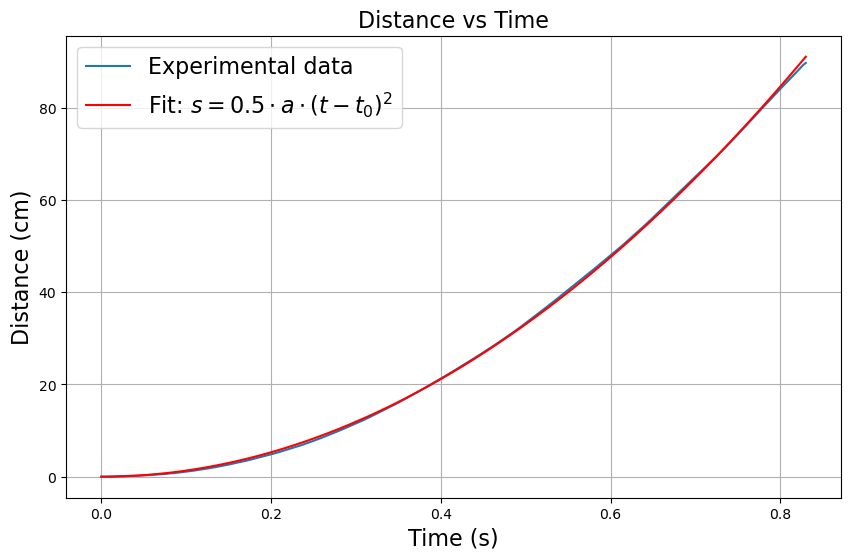

In [84]:
# Convert `delta_s_pixels` to meters using the scaling factor 
#delta_s_meters = delta_s_pixels * scaling_factor  

plt.figure(figsize=(10, 6))
#plt.errorbar(time, s_meters, yerr=delta_s_meters, fmt='bo', markersize=2, label='Experimental Data with Error')
plt.plot(time_selected, s, label =r'Experimental data')
plt.plot(time_selected, result.best_fit, 'r-', label=r'Fit: $s = 0.5 \cdot a \cdot (t - t_0)^2$')
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Distance (cm)', fontsize = 16)
plt.title('Distance vs Time', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
#plt.savefig('s_vs_t_metfout.png')
plt.show()


Import data

In [86]:
# All datasets, angles and start/end-values
datasets = {
    '5.29': {
    'file': 'C:/Natuurkunde/NSP2/Data/10cm_holle_cilinder_verbeterd.mqa',
    'start_index':226,
    'end_index':770},       
    '8.49': {
    'file':'C:/Natuurkunde/NSP2/Data/16cm_holle_cilinder.mqa',
    'start_index':216,
    'end_index':655},
    '11.71': {
    'file': 'C:/Natuurkunde/NSP2/Data/22cm_holle_cilinder.mqa',
    'start_index':194,
    'end_index':572},       
    '14.97': {
    'file':'C:/Natuurkunde/NSP2/Data/28cm_holle_cilinder.mqa',
    'start_index':169,
    'end_index':503},   
    '18.28': {
    'file':'C:/Natuurkunde/NSP2/Data/34cm_holle_cilinder.mqa',
    'start_index':164,
    'end_index':465},
    '21.65': {
    'file': 'C:/Natuurkunde/NSP2/Data/40cm_holle_cilinder.mqa',
    'start_index':246,
    'end_index':523},       
    '25.11': {
    'file':'C:/Natuurkunde/NSP2/Data/46cm_holle_cilinder.mqa',
    'start_index':382,
    'end_index':630},
    '28.67': {
    'file':'C:/Natuurkunde/NSP2/Data/52cm_holle_cilinder.mqa',
    'start_index':214,
    'end_index':464},
}

Plot $a$ and $\alpha$

   alpha           a
0   5.29   50.632172
1   8.49   78.563522
2  11.71  110.638740
3  14.97  142.126501
4  18.28  170.197643
5  21.65  201.777462
6  25.11  232.080456
7  28.67  264.192218


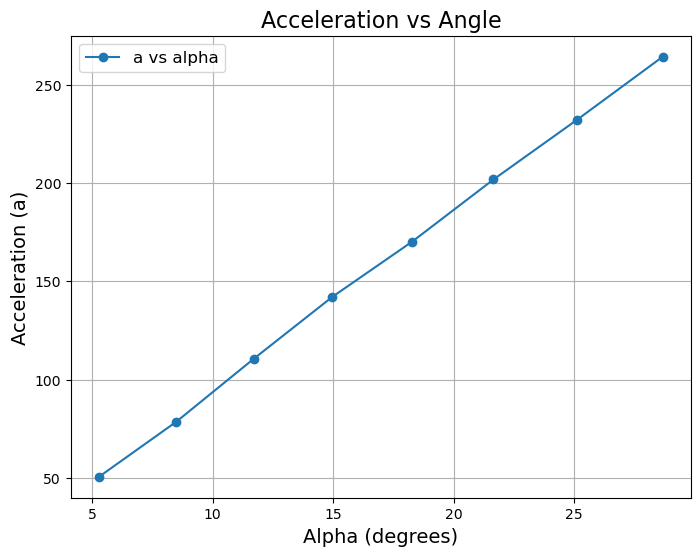

In [ ]:
# Initialize storage for results
results = []

# Loop over each dataset
for alpha_label, dataset_info in datasets.items():
    file_path = dataset_info['file']
    start_index = dataset_info['start_index']
    end_index = dataset_info['end_index']
    
    df = pd.read_csv(file_path, sep='\t', header=0)
    
    # Extract time, x-position, and y-position
    time = df['Time']
    x_position = df['Point #1.X']
    y_position = df['Point #1.Y']
    
    # Slice the data based on the manually specified range
    time_selected = time.iloc[start_index:end_index].reset_index(drop=True)
    x_position_selected = x_position.iloc[start_index:end_index].reset_index(drop=True)
    y_position_selected = y_position.iloc[start_index:end_index].reset_index(drop=True)

    # Adjust data to start at (0, 0)
    x_position_adjusted = x_position_selected - x_position_selected.iloc[0]
    y_position_adjusted = y_position_selected - y_position_selected.iloc[0]
    time_adjusted = time_selected - time_selected.iloc[0]
    
    # Calculate distance s
    s = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)
    
    # Define the theoretical model function for s
    def theoretical_s(t, a, t_0):
        return 0.5 * a * (t - t_0)**2
    
    # Use lmfit Model to define the model and fit the data
    model = Model(theoretical_s)
    params = model.make_params(a=1, t_0=0)  # Initial guess for parameters

    # Fit the model to the data
    try:
        result = model.fit(s, params, t=time_adjusted)
        fitted_a = result.params['a'].value
    except Exception as e:
        print(f"Error fitting data for alpha {alpha_label}: {e}")
        continue
    
    alpha = float(alpha_label)
    
    # Store the result
    results.append({'alpha': alpha, 'a': fitted_a})

# Convert results to a DataFrame for further use
results_df = pd.DataFrame(results)

# Display the data ready for plotting
print(results_df)


Plot $a$ and $\alpha$

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['alpha'], results_df['a'], 'o-', label='a vs alpha')
plt.xlabel('Alpha (degrees)', fontsize=14)
plt.ylabel('Acceleration (a)', fontsize=14)
plt.title('Acceleration vs Angle', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()